#### Implement Classification Tree on Synthetic Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from DT import ClassificationTree, evaluate_model, create_contour_plot

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



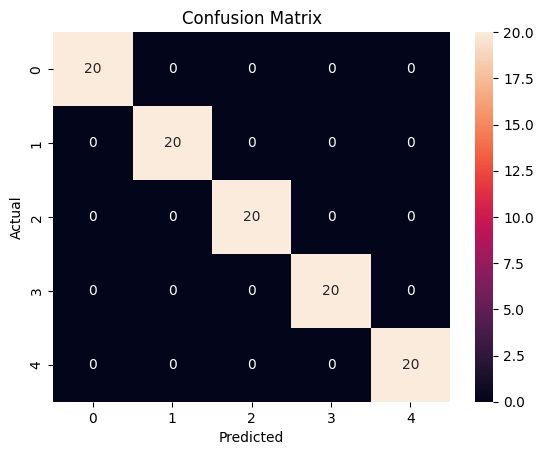

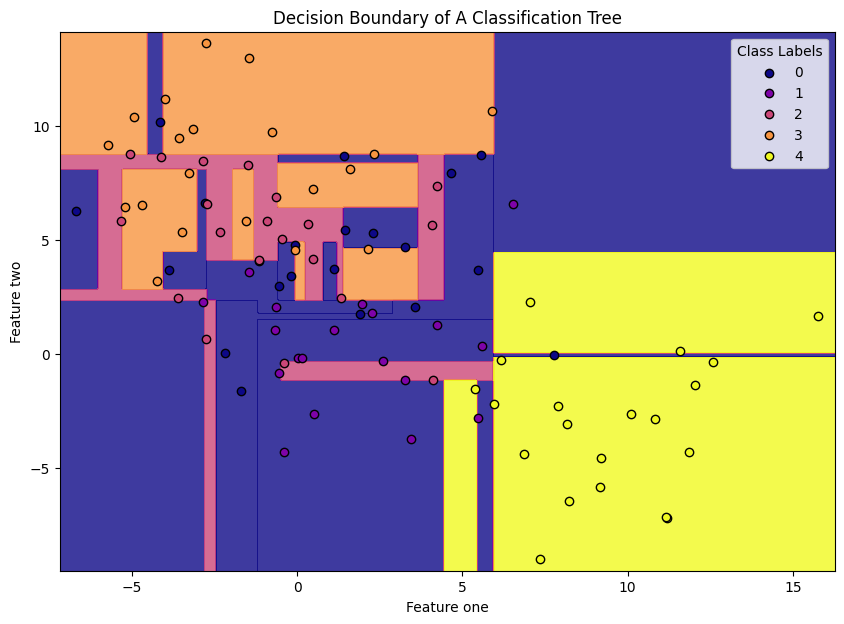

In [2]:
X,y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=3, random_state=0)
tree = ClassificationTree()
tree.fit(X, y)

# Evaluate model performance on training data
pred_Y = np.array([tree.predict_class(x) for x in X])
evaluate_model(y, pred_Y)

# Plot decision boundary and class labels
create_contour_plot(tree, X, y, resolution=500)